# Anlyzing credit card Customers 
## Intro
A manager at the bank is disturbed with more and more customers leaving their credit card services.  
They would really appreciate it if one could Tell what is common or define the Leaving customers.  
This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.  
let's check this data and find out what are the patterns of customers who have left.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the BankChurners.csv as pandas data frame

In [2]:
data = pd.read_csv(r'.\BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,810347208,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
1,708790833,Existing Customer,49,M,2,Unknown,Married,$120K +,Blue,31,...,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,0.000191,0.999810
2,712813458,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,19763.0,2517,17246.0,0.664,1414,35,0.250,0.127,0.000046,0.999950
3,714374133,Existing Customer,44,M,4,Post-Graduate,Single,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.996710,0.003294
4,710082708,Existing Customer,53,M,2,High School,Single,$120K +,Blue,32,...,23957.0,2102,21855.0,0.997,1276,26,0.733,0.088,0.000268,0.999730


#### Removing not relevant columns

In [4]:
new_data = data.copy()[['CLIENTNUM','Attrition_Flag','Customer_Age','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

#### Data overview

In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Card_Category    10127 non-null  object
dtypes: int64(2), object(6)
memory usage: 633.1+ KB


In [6]:
new_data.describe()

,CLIENTNUM,Customer_Age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


#### Adding binary value column for left costumers

In [7]:
new_data['haveleft']= np.where(new_data['Attrition_Flag']=='Attrited Customer',1,0)

##### Checking what percentage of our customers have left

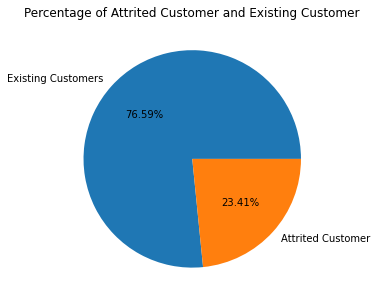

In [8]:
count=pd.value_counts(new_data['Attrition_Flag']).tolist()
plt.figure(figsize=(5,5))
plt.title("Percentage of Attrited Customer and Existing Customer")
plt.pie(x=count,labels=["Existing Customers","Attrited Customer"],autopct='%.2f%%')
plt.show()

#### Histogram of age 

array([[<AxesSubplot:title={'center':'Customer_Age'}>]], dtype=object)

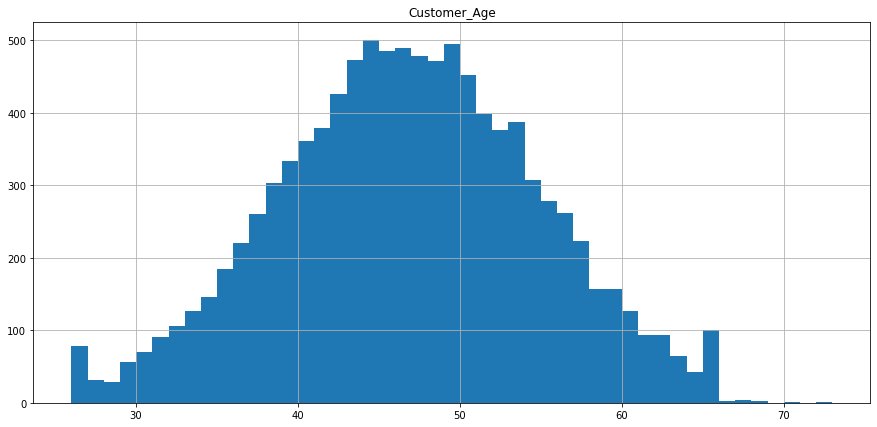

In [9]:
new_data.hist('Customer_Age',figsize=(15,7),bins=47)

The distribution of the age is Normal.  
Now check if age is a factor in leaving.  
by Getting the distribution of left customers by age.

<AxesSubplot:xlabel='Customer_Age'>

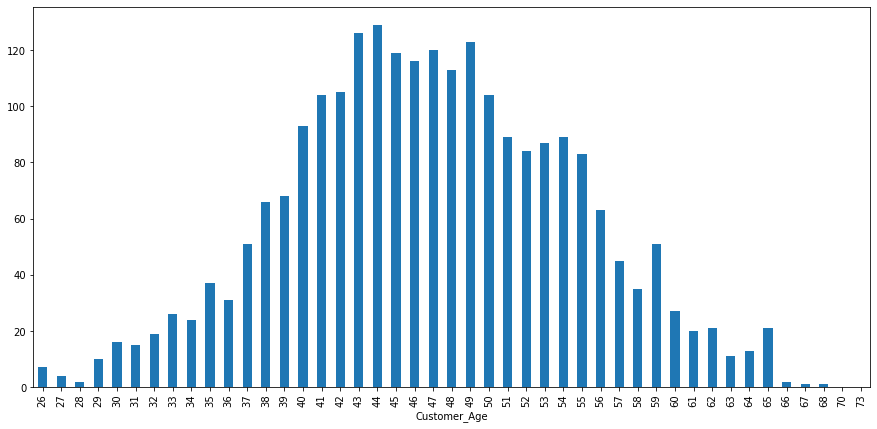

In [10]:
new_data.groupby(by="Customer_Age")['haveleft'].sum().plot(kind='bar',figsize=(15,7))

We can conclude from the plot above that even customers who have left by age are normally distributed.  
So age does not cause leaving

#### Getting leaving ratio by fields

In [11]:
columns=['Education_Level','Gender','Marital_Status','Income_Category','Card_Category']
for i in columns:
    print("Attrition ratio by "+str(i))
    leftdata=new_data[i][new_data['haveleft']==1].value_counts().rename_axis(i).reset_index(name='leave')
    totaldata=new_data[i].value_counts().rename_axis(i).reset_index(name='total')
    merged=pd.merge(leftdata,totaldata,how='left')
    merged['ratio_by_value(%)']=round((merged['leave']/merged['total'])*100,2)
    merged['ratio_relative_to_ALL(%)']=round((merged['leave']/data['CLIENTNUM'].count())*100,2)
    print(merged,'\n'*2)
    

Attrition ratio by Education_Level
  Education_Level  leave  total  ratio_by_value(%)  ratio_relative_to_ALL(%)
0        Graduate    712   3128              22.76                      7.03
1     High School    453   2013              22.50                      4.47
2         Unknown    365   1519              24.03                      3.60
3      Uneducated    358   1487              24.08                      3.54
4         College    220   1013              21.72                      2.17
5       Doctorate    138    451              30.60                      1.36
6   Post-Graduate    125    516              24.22                      1.23 


Attrition ratio by Gender
  Gender  leave  total  ratio_by_value(%)  ratio_relative_to_ALL(%)
0      F   1637   5358              30.55                     16.16
1      M    734   4769              15.39                      7.25 


Attrition ratio by Marital_Status
  Marital_Status  leave  total  ratio_by_value(%)  ratio_relative_to_ALL(%)
0  

By considering the combination of the leaving ratio by value with the relation of leaving ratio relative to all.  
The main relevant field Is:  
**Card Category: highest leaving ratio by value (38%)  and highest leaving ratio relative to all (22.4% from all the customers)**

AxesSubplot(0.125,0.125;0.775x0.755)


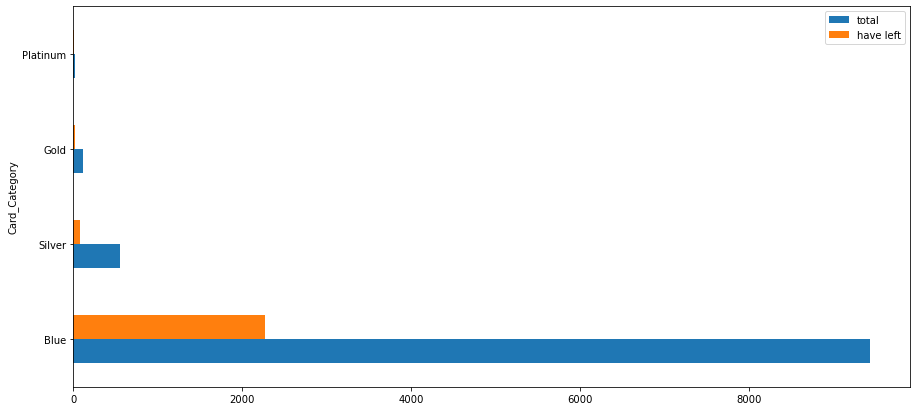

In [12]:
total=new_data['Card_Category'].value_counts().rename_axis('Card_Category').reset_index(name='total')
lefted=new_data['Card_Category'][new_data['haveleft']==1].value_counts().rename_axis('Card_Category').reset_index(name='have left')
merged=pd.merge(total,lefted,how='left').plot.barh(x='Card_Category',figsize=(15,7))
print(merged)

##### Filtering the customers who related to the relevant Card_Category (Blue) 

In [13]:
filterdata = new_data[new_data['Card_Category']== 'Blue']

Now let's deep dive into those customers to get more details about them in order to find out where is the most leaving customers located

In [14]:
columns=['Income_Category','Education_Level','Marital_Status','Gender']
for i in columns:   
    print('value counts by '+i)
    dftotal=filterdata[i].value_counts().rename_axis(i).reset_index(name='total')
    dfleft=filterdata[i][filterdata['haveleft']==1].value_counts().rename_axis(i).reset_index(name='leave')
    df=pd.merge(dftotal,dfleft,how='left')  
    df['ratio_by_value(%)']=round((df['leave']/df['total'])*100,2)
    df['ratio_relative_to_ALL(%)']=round((df['leave']/data['CLIENTNUM'].count())*100,2)
    print(df,'\n'*2)

value counts by Income_Category
  Income_Category  total  leave  ratio_by_value(%)  ratio_relative_to_ALL(%)
0  Less than $40K   3403   1335              39.23                     13.18
1     $40K - $60K   1675    257              15.34                      2.54
2    $80K - $120K   1395    215              15.41                      2.12
3     $60K - $80K   1273    172              13.51                      1.70
4         Unknown   1045    176              16.84                      1.74
5         $120K +    645    113              17.52                      1.12 


value counts by Education_Level
  Education_Level  total  leave  ratio_by_value(%)  ratio_relative_to_ALL(%)
0        Graduate   2899    677              23.35                      6.69
1     High School   1888    435              23.04                      4.30
2         Unknown   1420    353              24.86                      3.49
3      Uneducated   1391    343              24.66                      3.39
4        

First of all, we can infer that the material status of Married and Single customers have a really high leaving ratio related to the others so they should be filtered.  

In order to know about any pattern of leaving customers, we have to be focused.  
As we can see from the above there is a huge-range leaving ratio for the values.  
We Have to define what is the limit of leaving ratio that might show us a pattern of leaving.
By considering the results I decided to define the limit of 2%  leaving the ratio relative to all.  
It means that any value from all the fields that have leaving ratio under 2% is not relevant.  
So the next step is to filter the values that have leaving ratio above 2%.

In [15]:
filtered2=filterdata[filterdata['Marital_Status'].isin(['Single','Married']) & filterdata['Education_Level'].isin(['Graduate','High School','Uneducated','College'])
                    & filterdata['Income_Category'].isin(['Less than $40K','$40K - $60K','$80K - $120K'])]


#### For getting specific values that can define leaving patterns for specific groups of values we have to group the data by Income Category, Education Level, and Gender.

In [16]:
grouped=filtered2.groupby(by=['Income_Category','Education_Level','Gender',]).agg(Total_amount=('CLIENTNUM','count'),leaving_amount=('haveleft' ,'sum'))
grouped['leaving_ratio_of_group(%)']=round((grouped['leaving_amount']/grouped['Total_amount'])*100,2)
grouped['leaving_ratio_relative_to_ALL(%)']=round((grouped['leaving_amount']/data['CLIENTNUM'].count())*100,2)
grouped.sort_values(by='leaving_ratio_relative_to_ALL(%)',ascending=False)

Total_amount  leaving_amount  \
Income_Category Education_Level Gender                                 
Less than $40K  Graduate        F                849             343   
                High School     F                508             196   
                Uneducated      F                398             160   
                College         F                263              96   
$80K - $120K    Graduate        M                373              50   
$40K - $60K     Graduate        F                257              39   
                High School     F                168              32   
$80K - $120K    High School     M                234              29   
                Uneducated      M                164              28   
                College         M                131              27   
$40K - $60K     Graduate        M                182              21   
                Uneducated      M                 98              17   
Less than $40K  Graduate        M                 78              17   
$40K - $60K     Uneducated      F                 96              15   
                College         F                 86              13   
Less than $40K  High School     M                 42              11   
$40K - $60K     High School     M                126              11   
                College         M                 53               6   
Less than $40K  Uneducated      M                 33               6   
                College         M                 18               4   

                                        leaving_ratio_of_group(%)  \
Income_Category Education_Level Gender                              
Less than $40K  Graduate        F                           40.40   
                High School     F                           38.58   
                Uneducated      F                           40.20   
                College         F                           36.50   
$80K - $120K    Graduate        M                           13.40   
$40K - $60K     Graduate        F                           15.18   
                High School     F                           19.05   
$80K - $120K    High School     M                           12.39   
                Uneducated      M                           17.07   
                College         M                           20.61   
$40K - $60K     Graduate        M                           11.54   
                Uneducated      M                           17.35   
Less than $40K  Graduate        M                           21.79   
$40K - $60K     Uneducated      F                           15.62   
                College         F                           15.12   
Less than $40K  High School     M                           26.19   
$40K - $60K     High School     M                            8.73   
                College         M                           11.32   
Less than $40K  Uneducated      M                           18.18   
                College         M                           22.22   

                                        leaving_ratio_relative_to_ALL(%)  
Income_Category Education_Level Gender                                    
Less than $40K  Graduate        F                                   3.39  
                High School     F                                   1.94  
                Uneducated      F                                   1.58  
                College         F                                   0.95  
$80K - $120K    Graduate        M                                   0.49  
$40K - $60K     Graduate        F                                   0.39  
                High School     F                                   0.32  
$80K - $120K    High School     M                                   0.29  
                Uneducated      M                                   0.28  
                College         M                                   0.27  
$40K - $60K     Graduate        M   

## Summary:
My insights about the leaving customers:  
1. The most general insight is: The customers that have the card category of Blue have the highest leaving ratio related to the other cards and to all (22.4% out of 23.4% leaving ratio in general).       
Considering that Blue cards customers are 93.18% of all. we have to be more specific about them.     
2. Most of the Blue cards customers that are Single or Married have a high ratio of general leaving (18.96% out of 23.4 general leaving ratio).    
3. Most of the leaving customers are Females with leaving the ratio of 31.41% (Males 15.36%).      
4. Most of the leaving customers related to Income category of Less than 40K (13.18% out of 23.4% leaving ratio in general).    
In case we want even more specific detail about leaving costumers    
5. we can see from the grouped data frame above the top leaving groups (All the Above are Blue card and Single or Married customers).     